In [42]:
import numpy as np
# Import decision tree and svm classifiers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [43]:
# Read the data. We do not need the header and date column of the file
# Change the path if required
fp = open("../data/EW-MAX.csv")
data = np.array([[float(i.strip()) for i in line.split(',')[1:]] for line in fp.readlines()[1:]])

print(data[0])

[3.81250e+00 4.15625e+00 3.81250e+00 4.12500e+00 4.12500e+00 3.67560e+06]


### Preprocessing

In [44]:
# Remove Volume feature
data = data[:,:5]
print(data[0])

[3.8125  4.15625 3.8125  4.125   4.125  ]


In [45]:
# One day ahead prediction using data of previous three days
new_data = list()
for i in range(2, len(data)):
    new_data.append(np.concatenate((data[i], data[i-1], data[i-2])))

In [46]:
# Since we are going to predict one day ahead, the last sample is not required
X, Y = np.array(new_data), np.zeros(len(new_data)-1)

print(Y[:100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [47]:
# Now perform labelling. Given yesterday's closing price, predict today's opening high and low
for i in range(len(X)-1):
    # Opening price is Y
    Y[i] = X[i+1][0]

In [48]:
# We can now remove the last sample
X = X[:-1, :]

In [49]:
Y[:100]

array([4.      , 3.734375, 3.5     , 3.53125 , 3.46875 , 3.5     ,
       3.59375 , 3.6875  , 3.578125, 3.546875, 3.578125, 3.609375,
       3.578125, 3.609375, 3.5625  , 3.578125, 3.59375 , 3.578125,
       3.78125 , 3.765625, 3.6875  , 3.75    , 3.65625 , 3.546875,
       3.59375 , 3.71875 , 3.84375 , 3.859375, 3.75    , 3.796875,
       3.734375, 3.875   , 4.125   , 4.125   , 4.      , 3.890625,
       3.859375, 3.875   , 3.90625 , 4.078125, 4.359375, 4.5     ,
       4.9375  , 5.015625, 4.96875 , 4.734375, 4.5625  , 4.375   ,
       4.5625  , 4.59375 , 4.65625 , 4.625   , 4.65625 , 4.609375,
       4.59375 , 4.390625, 4.5     , 4.484375, 4.6875  , 4.890625,
       5.      , 4.96875 , 4.6875  , 5.140625, 5.078125, 4.71875 ,
       5.140625, 4.953125, 5.125   , 5.140625, 5.359375, 5.5625  ,
       5.5     , 5.875   , 5.796875, 5.8125  , 6.03125 , 6.09375 ,
       5.984375, 6.234375, 6.1875  , 6.125   , 5.921875, 5.84375 ,
       5.75    , 5.4375  , 5.65625 , 5.625   , 5.71875 , 5.75 

In [50]:
# Perform a train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
scaler1, scaler2= StandardScaler(), StandardScaler()
X_train, X_test = scaler1.fit_transform(X_train), scaler1.transform(X_test)
Y_train, Y_test = scaler2.fit_transform(Y_train.reshape(-1,1)), scaler2.transform(Y_test.reshape(-1,1))

### Prediction

In [51]:
# Perform predictions
# Check out both svm and decision tree. Try adding polynomial features and see which gives best results.
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LeakyReLU 
from keras import optimizers

lk = LeakyReLU()

model = Sequential()
model.add(Dense(units=30, input_dim=len(X_train[0]), activation=lk))
model.add(Dense(units=1, activation=lk))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.fit(X_train, Y_train, epochs=10, batch_size=32, shuffle=True, verbose=1)
preds = model.predict(X_test)

print(mean_squared_error(Y_test, preds))

C:\ProgramData\Anaconda3\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
C:\ProgramData\Anaconda3\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Epoch 1/10
3511/3511 [==============================] - 1s 421us/step - loss: 0.2502 - mean_squared_error: 0.2502
Epoch 2/10
3511/3511 [==============================] - 1s 244us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 3/10
3511/3511 [==============================] - 1s 340us/step - loss: 9.6332e-04 - mean_squared_error: 9.6332e-04
Epoch 4/10
3511/3511 [==============================] - 1s 200us/step - loss: 8.6669e-04 - mean_squared_error: 8.6669e-04
Epoch 5/10
3511/3511 [==============================] - 1s 192us/step - loss: 8.1598e-04 - mean_squared_error: 8.1598e-04
Epoch 6/10
3511/3511 [==============================] - 1s 193us/step - loss: 7.9342e-04 - mean_squared_error: 7.9342e-04
Epoch 7/10
3511/3511 [==============================] - 1s 228us/step - loss: 7.7293e-04 - mean_squared_error: 7.7293e-04
Epoch 8/10
3511/3511 [==============================] - 1s 306us/step - loss: 7.7736e-04 - mean_squared_error: 7.7736e-04
Epoch 9/10
3511/3511 [==================

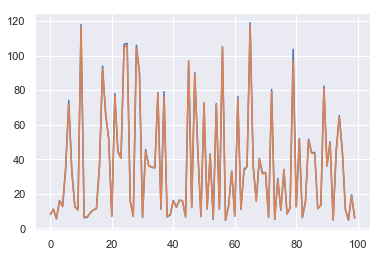

In [53]:
y_test_rescale = scaler2.inverse_transform(Y_test)
y_pred_rescale = scaler2.inverse_transform(preds)

plt.plot(y_test_rescale[:100], label='original')
plt.plot(y_pred_rescale[:100], label='predict')
plt.show()